# Assignment of Research Track 2
### Matteo Carlone s4652067
--------

## UI for the Final-Assignment of Research Track 1
#### All the modalities are handled with pywidgets:
* For the first modality the user will set a target position, the robot will try to get the set goal and there will be the possibility of canceling the goal via the proper button.
* For the second and third modality a simple pad will let control the robot in space, it works by clicking many times on the desired button.

In [1]:
from ipywidgets import Button, Layout, ButtonStyle, GridBox , Box
import ipywidgets as widgets
import jupyros as jr
import rospy
import os
import signal
from std_msgs.msg import String

from sensor_msgs.msg import LaserScan

from geometry_msgs.msg import Twist

free_left = 1
free_right = 1
free_straight = 1

pub = rospy.Publisher('cmd_vel', Twist, queue_size = 1)

rospy.init_node('jupyter_node')

out = widgets.Output(layout={'border': '80px solid black'})

# Modality Buttons
Mode_1 = Button(description='Mode_1 - Autonomous Drive',
            layout=Layout(width='auto', align="center", grid_area='b1'),
            style=ButtonStyle(button_color='lightblue'))
Mode_2 = Button(description='Mode_2 - Free Drive', 
            layout=Layout(width='auto', grid_area='b2'),
            style=ButtonStyle(button_color='moccasin'))
Mode_3 = Button(description='Mode_3 - Driver Assistant',
            layout=Layout(width='auto', grid_area='b3'),
            style=ButtonStyle(button_color='lightgreen'))
Mode_4 = Button(description='Quit',
            layout=Layout(width='auto', grid_area='b4'),
            style=ButtonStyle(button_color='red'))

Goal_Cancel = Button(description='Goal_Cancel', button_style='danger')

Start = Button(description='Start',button_color='green')

#Teleop Buttons

b_straight = Button(description='Go straight',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='darkseagreen'))

b_backward = Button(description='Go backwards',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='darkseagreen'))

b_left = Button(description='Go left',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='lightblue'))

b_right = Button(description='Go right',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='lightblue'))

b_stop = Button(description='stop',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='salmon'))

b_nan = Button(description=' ',
            layout=Layout(width='auto', height='auto'),
            style=ButtonStyle(button_color='lightyellow'))





In [2]:

GridBox(children=[Mode_1, Mode_2, Mode_3, Mode_4],
        layout=Layout(
            width='100%',
            grid_template_rows='auto auto',
            grid_template_columns='33% 33% 33%',
            grid_template_areas=''' 
            " . b1 . " 
            "b2 . b3 "
            ". b4 . " ''')
        )



GridBox(children=(Button(description='Mode_1 - Autonomous Drive', layout=Layout(grid_area='b1', width='auto'),…

Mode_1
Insert the goal position:


FloatText(value=0.0)

FloatText(value=0.0)

Button(description='Start', style=ButtonStyle())

-1.0
-1.0


Button(button_style='danger', description='Goal_Cancel', style=ButtonStyle())

Mode_1
Insert the goal position:


FloatText(value=-1.0)

FloatText(value=-1.0)

Button(description='Start', style=ButtonStyle())

5.0
-1.0


Button(button_style='danger', description='Goal_Cancel', style=ButtonStyle())

5.0
-1.0


Button(button_style='danger', description='Goal_Cancel', style=ButtonStyle())

Mode_1
Insert the goal position:


FloatText(value=5.0)

FloatText(value=-1.0)

Button(description='Start', style=ButtonStyle())

4.0
-2.0


Button(button_style='danger', description='Goal_Cancel', style=ButtonStyle())

canceling the goal....


In [3]:
def clbk_laser(msg):

    #Callback on the Laser Scanner, sensor to detect obstacles
    
    if rospy.get_param('mode') == 3:
        twist = Twist()

        global free_left
        global free_right
        global free_straight
        # Detecting obstacles on the right of the robot
        right = min(min(msg.ranges[0:143]), 1)  
        # Detecting obstacles in front of the robot    
        front = min(min(msg.ranges[288:431]), 1)  
        # Detecting obstacles on the left of the robot  
        left = min(min(msg.ranges[576:719]), 1)     

        if right != 1.0: #and twist.angular.z<0 :        #No obstacles detected on the right at a distance less than 1 meter
            
            free_right = 0
            twist.angular.z = 0;
            
        else:                   #Obstacle detected on the right of the robot
            
            free_right = 1

        if front != 1.0: #and twist.linear.x>0:        #No obstacles detected in the front direction at a distance less than 1 meter
            
            free_straight = 0
            twist.linear.x = 0;
            
            
        else:                   #Obstacle detected in front of the robot
            
            free_straight = 1
            
        if left != 1.0: #and twist.angular.z>0:         #No obstacles detected on the left at a distance less than 1 meter
            
            free_left = 0
            twist.angular.z = 0;
            
        else:                   #Obstacle detected on the left of the robot
            free_left = 1
            
        pub.publish(twist)
            
    else:
        pass


In [4]:
x_val = 0
y_val = 0

x = widgets.FloatText() 
y = widgets.FloatText() 


### Mode 1

def on_button_clicked(Mode_1):
    
    global  x, y
    
    print("Mode_1")
    
    print('Insert the goal position:')
    
    display(x,y)

    display(Start)
    

Mode_1.on_click(on_button_clicked)

def on_button_clicked(Start):
    
    global x, y, x_val , y_val
    
    rospy.set_param('mode', 0)
    
    x_val = x.value
    y_val = y.value
    
    
    print(x_val)
    
    print(y_val)
    
    
    rospy.set_param('des_pos_x', x_val) 
    rospy.set_param('des_pos_y', y_val)
    
    rospy.set_param('mode', 1)
   
    display(Goal_Cancel)
    
Start.on_click(on_button_clicked)


def on_button_clicked(Goal_Cancel):
    
    print("canceling the goal....")
    
    rospy.set_param('mode', 0)
    
Goal_Cancel.on_click(on_button_clicked)

### Mode 2

def on_button_clicked(Mode_2):
    
    print("Mode_2")
    
    rospy.set_param('mode', 2)
    
    
    display(GridBox(children=[b_nan,b_straight,b_nan,
                              b_left,b_stop,b_right,
                              b_nan,b_backward,b_nan
                 ],
        layout=Layout(
            width='50%',
            grid_template_columns='175px 125px 175px',
            grid_template_rows='125px auto 125px',
            grid_gap='5px 10px')
       ))
    
    
    
Mode_2.on_click(on_button_clicked)


#### Mode 3

def on_button_clicked(Mode_3):
    
    print("Mode_3")
    
    rospy.set_param('mode', 3)
    
    display(GridBox(children=[b_nan,b_straight,b_nan,
                              b_left,b_stop,b_right,
                              b_nan,b_backward,b_nan
                 ],
        layout=Layout(
            width='50%',
            grid_template_columns='175px 125px 175px',
            grid_template_rows='125px auto 125px',
            grid_gap='5px 10px')
       ))

    
    
    
Mode_3.on_click(on_button_clicked)

def on_button_clicked(Mode_4):
    
    print("Quit")
    
    #os.kill(os.getpid(), signal.SIGKILL)
    
    return -1

Mode_4.on_click(on_button_clicked)
    
#### Teleop buttons

def move_straight(b):
    global free_straight
    global pub
    
    
    twist = Twist()
    if free_straight == 1:
        
        twist.linear.x = 1
        twist.angular.z = 0
    else:
         twist.linear.x = 0
        
    pub.publish(twist)

b_straight.on_click(move_straight)

def move_backward(b):
    global pub
    
    twist = Twist()
    if free_backward == 1:
        twist.linear.x = -1
        twist.angular.z = 0
    else:
        twist.linear.x = 0
    pub.publish(twist)

b_backward.on_click(move_backward)

def move_right(b):
    global free_right
    global pub
     
    
    twist = Twist()
    if free_right == 1:
        twist.angular.z = -1
        twist.linear.x = 0
    else:
        twist.angular.z = 0
        
    pub.publish(twist)

b_right.on_click(move_right)

def move_left(b):
    global free_left
    global pub
     
    twist = Twist()
    if free_left == 1:
        twist.angular.z = 1
        twist.linear.x = 0
        
    else:
         twist.angular.z = 0
        
    pub.publish(twist)

b_left.on_click(move_left)

def stopped(b):
    global pub
    twist = Twist()
    # Publish stop message when thread exits.
    
    twist.linear.x = 0
    twist.linear.y = 0
    twist.linear.z = 0
    twist.angular.x = 0
    twist.angular.y = 0
    twist.angular.z = 0
    
    pub.publish(twist)

b_stop.on_click(stopped)

sub = rospy.Subscriber('/scan', LaserScan, clbk_laser)



## DATA VISUALIZATION
-----
### A class called visualizer allowed me to graph the run time position of the robot in space, the position/status of the goal targets from modality 1 and what the robot's scanner visualize while moving in the environment .
*  For the first plot I subscribed to the odometry topic of the robot.
*  For the second plot I subscribed to the Move_Base Action in order to get the status of the targets.
*  For the third plot I subscribed to the Lase_Scar topic 


<IPython.core.display.Javascript object>


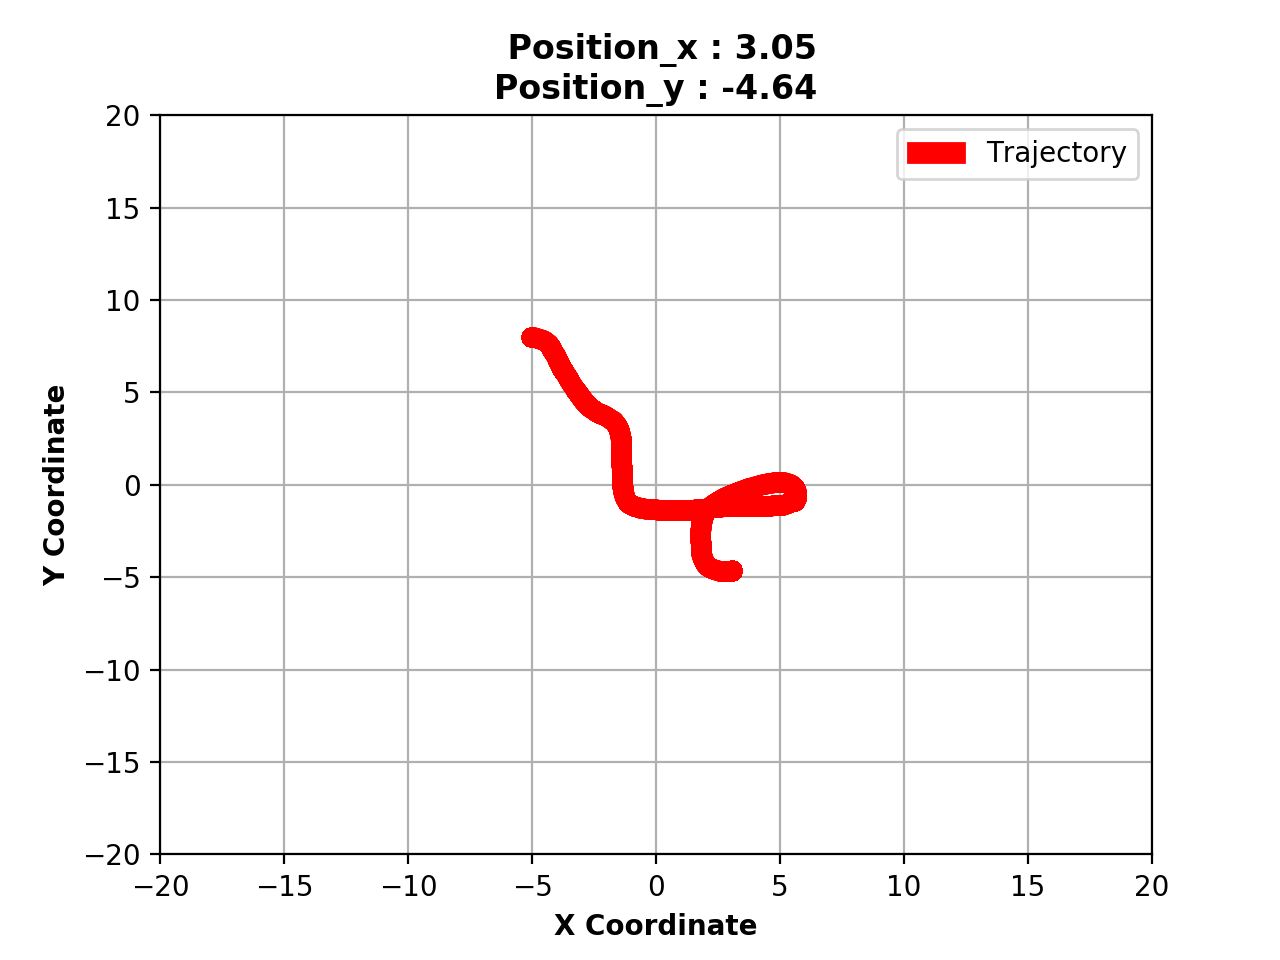

<IPython.core.display.Javascript object>


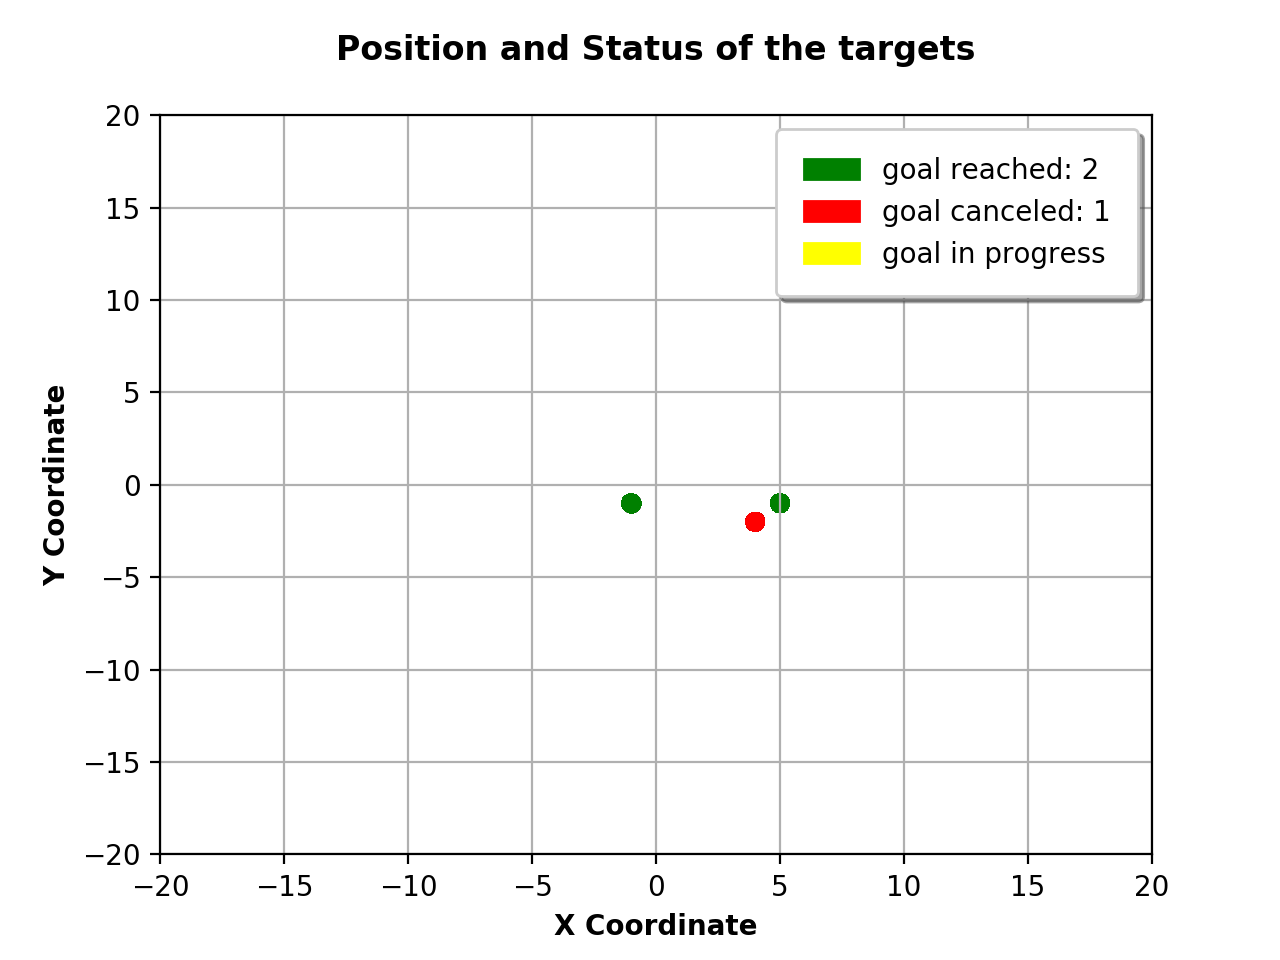

<IPython.core.display.Javascript object>


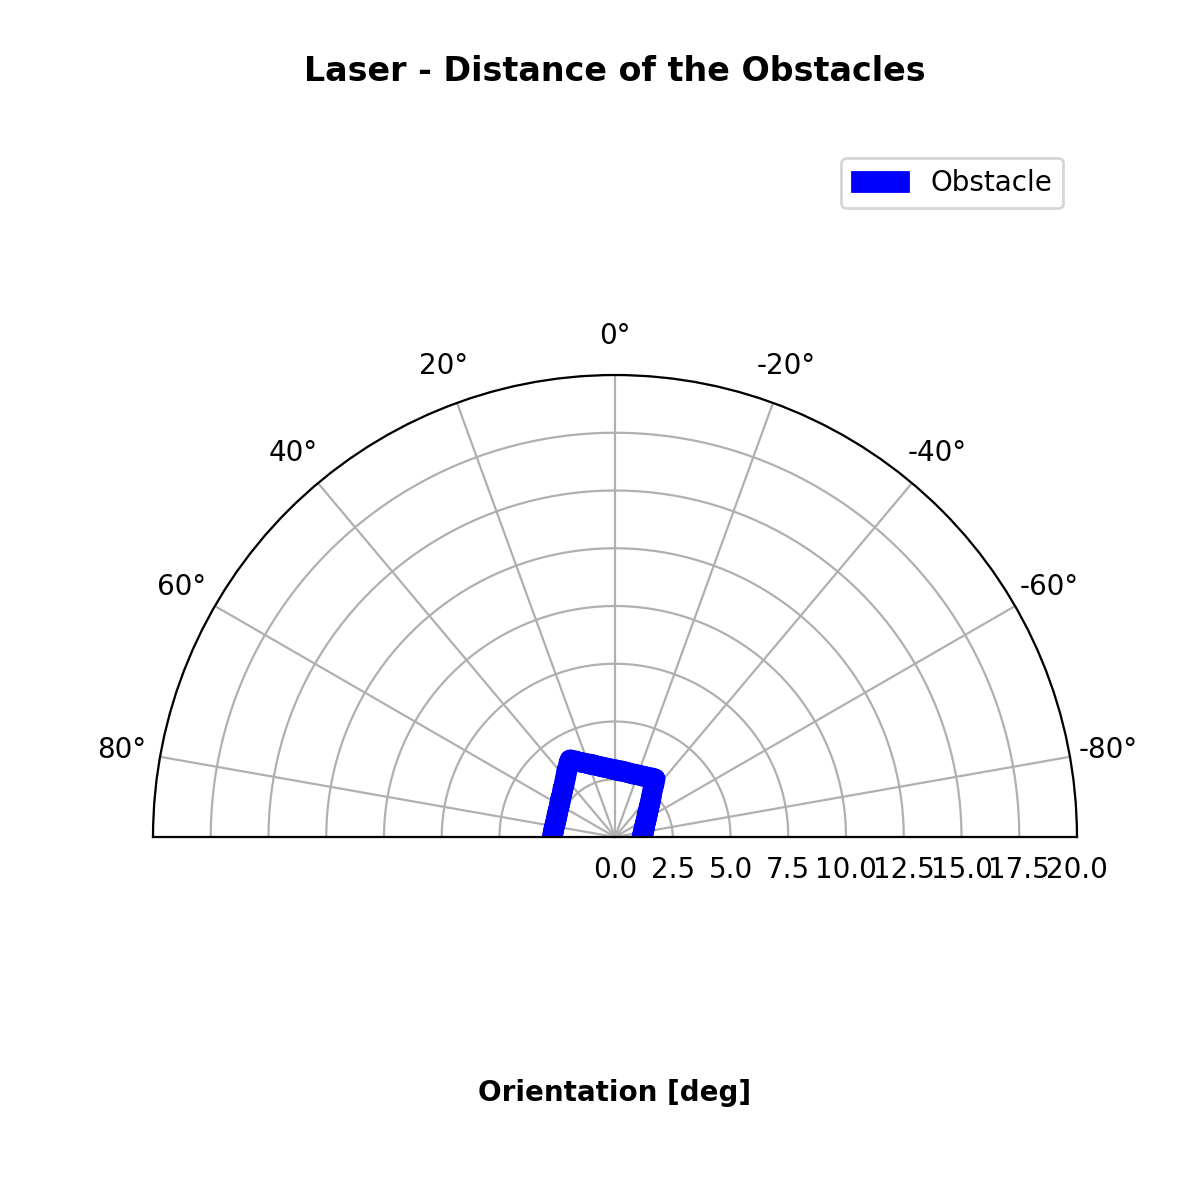

In [5]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from sensor_msgs.msg import LaserScan
from move_base_msgs.msg import MoveBaseActionGoal 
from nav_msgs.msg import Odometry
from actionlib_msgs.msg import GoalStatusArray
import time

status = -1
status_ = -1

colors=[]

angles = []

achieved = 0

canceled = 0

x_data = 0
y_data = 0


class Visualiser:
    def __init__(self):
       
        self.fig,self.ax = plt.subplots()
        self.ln, = self.ax.plot([], [], 'ro')
        plt.grid(True)
      
        self.fig3,self.ax3 = plt.subplots()
        plt.grid(True)
        
        
        self.figp = plt.figure(figsize=(6,6))
        self.ax_p = plt.subplot(111, polar=True)
        self.ax_p.set_thetalim(-np.pi/2,np.pi/2)
        self.ax_p.set_theta_zero_location("N")
       
        self.lnp, = self.ax_p.plot([],[],'bo')
        plt.grid(True)
        
        
        self.laser = []
        self.x_data, self.y_data = [] , []        
        self.x_des,self.y_des=[],[]
        
    
    
    def plot_init(self):
        
        
        
        self.ax.set_xlim(-20, 20)
        self.ax.set_ylim(-20,20)
        self.ax.set_xlabel("X Coordinate",fontweight="bold")
        self.ax.set_ylabel("Y Coordinate",fontweight="bold")
        
        
        self.ax_p.set_title("Laser - Distance of the Obstacles",fontweight="bold")
        self.ax_p.set_xlabel("Orientation [deg]",fontweight="bold")
       
        
        
        self.ax3.set_title("Position and Status of the targets\n",fontweight="bold")
        self.ax3.set_xlim(-20, 20)
        self.ax3.set_ylim(-20,20)
        self.ax3.set_xlabel("X Coordinate",fontweight="bold")
        self.ax3.set_ylabel("Y Coordinate",fontweight="bold")
        
        
        return self.ln
    
    def scan_callback(self, msg):
        
        global angles
        
        self.laser=list(msg.ranges)
       
        angles = list(np.arange(msg.angle_min, msg.angle_max+msg.angle_increment, msg.angle_increment))

        return self.laser
        
    def odom_callback(self, msg):
        global x_data , y_data 
        
        x_data = msg.pose.pose.position.x
        
        y_data = msg.pose.pose.position.y
       
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)
       
        
    def clbk_status(self,msg):
        global x_val,y_val,status,status_,colors, achieved , canceled
        try:
            status=msg.status_list[0].status
        except IndexError:
            pass

        if status!=status_:
            if status==2:
                colors[-1]='r'
                canceled = canceled + 1
                
            elif status==3:
                colors[-1]='g'
                achieved = achieved + 1

               
        status_=status
    
    
    def clbk_goal(self,msg):
        global x_val,y_val,x_fromAni,y_fromAni,colors
        self.x_des.append(x_val)
        self.y_des.append(y_val)
        x_fromAni=self.x_des
        y_fromAni=self.y_des
        colors.append('y')

    def update_plot(self, frame):    
        
        global x_data , y_data 
        self.ln.set_data(self.x_data, self.y_data) 
        
        legend = {'Trajectory':'red'} 
        
        labels = list(legend.keys())
        handles = [plt.Rectangle((0,0),1,1, color=legend[label]) for label in labels]
        self.ax.legend(handles, labels,loc='upper right')
        self.ax.set_title(' Position_x : ' + str(round(x_data,2)) +'\n'+ 
                  'Position_y : ' + str(round(y_data,2)),fontweight="bold")
                  
        return self.ln
    
    
    def update_plot3(self, frame): 
        global colors , achieved
        scatter=self.ax3.scatter(self.x_des,self.y_des,c=colors)
        
        legend = {'goal reached: '+ str(achieved) :'green'  , 
              'goal canceled: '+ str(canceled) :'red' , 
              'goal in progress':'yellow'}  
        
        labels = list(legend.keys())
        handles = [plt.Rectangle((0,0),1,1, color=legend[label]) for label in labels]
        self.ax3.legend(handles, labels,loc='upper right',fancybox=True, framealpha=1, shadow=True, borderpad=1)

        
    def update_polar(self, frame):
        
        global angles    
        legend = {'Obstacle':'blue'}
        labels = list(legend.keys())
        handles = [plt.Rectangle((0,0),1,1, color=legend[label]) for label in labels]
        self.ax_p.legend(handles, labels, loc ='upper right')
        self.ax_p.set_rmax(20)
        self.lnp.set_data(angles,self.laser)
        return self.lnp 
        

vis = Visualiser()
sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)
sub2 = rospy.Subscriber('/scan', LaserScan, vis.scan_callback)
subStatus=rospy.Subscriber('/move_base/status',GoalStatusArray,vis.clbk_status)
subGoal=rospy.Subscriber('/move_base/goal',MoveBaseActionGoal,vis.clbk_goal)

ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init)

ani3= FuncAnimation(vis.fig3, vis.update_plot3, init_func=vis.plot_init)

anip= FuncAnimation(vis.figp, vis.update_polar, blit = True)

plt.show(block=True)

